# Dependencies and files

## Imports

In [42]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Global variables

## Load files

### Load pseudobulks

In [83]:
adata_pb = sc.read_h5ad('../data/snRNAseq_data/velmeshevvelm_pb_sum.h5ad')
adata_pb = adata_pb[(adata_pb.obs.diagnosis == "Control")]
adata_pb

View of AnnData object with n_obs × n_vars = 321 × 41202
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids'
    layers: 'psbulk_props'

In [84]:
#annot = sc.queries.biomart_annotations("hsapiens", ["ensembl_gene_id", "start_position", "end_position", "chromosome_name", "gene_biotype"])
adata_pb.var.columns = ['ensembl_gene_id']
new_var = adata_pb.var.reset_index().set_index('ensembl_gene_id').merge(annot.set_index('ensembl_gene_id'), left_index=True, right_index=True).reset_index().set_index('index')
adata_pb = adata_pb[:, new_var.index]
adata_pb.var = new_var
adata_pb

AnnData object with n_obs × n_vars = 321 × 39965
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [85]:
adata_pb = adata_pb[:, adata_pb.var.gene_biotype == 'protein_coding']
adata_pb

View of AnnData object with n_obs × n_vars = 321 × 18233
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [86]:
adata_pb.obs.cluster.value_counts()

cluster
AST-FB              19
AST-PP              19
OPC                 19
Neu-mat             19
Neu-NRGN-II         19
Neu-NRGN-I          19
L5/6-CC             19
L5/6                19
L4                  19
L2/3                19
IN-VIP              19
IN-SV2C             19
IN-SST              19
IN-PV               19
Endothelial         19
Oligodendrocytes    19
Microglia           17
Name: count, dtype: int64

In [87]:
adata_pb.obs.psbulk_n_cells = adata_pb.obs.psbulk_n_cells.astype(float)
adata_pb.obs[['cluster', 'psbulk_n_cells']].groupby(['cluster']).sum()

c:\projects\spatialMPFC\venv\Lib\site-packages\pandas\core\generic.py:6329: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value
C:\Users\claptar\AppData\Local\Temp\ipykernel_20636\3095053631.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pb.obs[['cluster', 'psbulk_n_cells']].groupby(['cluster']).sum()


psbulk_n_cells
cluster                         
AST-FB                    2114.0
AST-PP                    2530.0
Endothelial               1548.0
IN-PV                     2062.0
IN-SST                    2449.0
IN-SV2C                    887.0
IN-VIP                    2686.0
L2/3                      6085.0
L4                        3258.0
L5/6                      1780.0
L5/6-CC                   2210.0
Microglia                 1822.0
Neu-NRGN-I                2027.0
Neu-NRGN-II               4731.0
Neu-mat                   1981.0
OPC                       4783.0
Oligodendrocytes          9603.0

In [88]:
adata_pb = adata_pb[adata_pb.obs.psbulk_n_cells > 100]
adata_pb

View of AnnData object with n_obs × n_vars = 172 × 18233
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [89]:
adata_pb.obs.cluster.value_counts()

cluster
OPC                 19
L2/3                17
Oligodendrocytes    16
IN-SST              15
IN-VIP              11
L4                  11
Neu-NRGN-II         11
Microglia           10
AST-FB               9
AST-PP               9
IN-PV                9
L5/6-CC              9
L5/6                 8
Endothelial          6
Neu-NRGN-I           6
Neu-mat              6
Name: count, dtype: int64

In [90]:
adata_pb.obs[['cluster', 'psbulk_n_cells']].groupby(['cluster']).sum()

C:\Users\claptar\AppData\Local\Temp\ipykernel_20636\2278282110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pb.obs[['cluster', 'psbulk_n_cells']].groupby(['cluster']).sum()


psbulk_n_cells
cluster                         
AST-FB                    1438.0
AST-PP                    2109.0
Endothelial               1163.0
IN-PV                     1389.0
IN-SST                    2183.0
IN-VIP                    2057.0
L2/3                      5932.0
L4                        2811.0
L5/6                      1231.0
L5/6-CC                   1765.0
Microglia                 1555.0
Neu-NRGN-I                1574.0
Neu-NRGN-II               4324.0
Neu-mat                   1234.0
OPC                       4783.0
Oligodendrocytes          9510.0

In [91]:
adata_pb.obs.individual.value_counts()

individual
4341    29
5893    20
5958    16
5387    15
5554    14
5577    13
5408    11
5391     8
5242     7
5538     7
5879     7
5936     7
6032     7
5163     6
5976     3
1823     2
Name: count, dtype: int64

In [92]:
adata_pb = adata_pb[~adata_pb.obs.individual.isin(['1823', '5976'])]
adata_pb

View of AnnData object with n_obs × n_vars = 167 × 18233
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [93]:
expression = pd.DataFrame(adata_pb.X, index=adata_pb.obs_names, columns=adata_pb.var_names)
expression.T.to_csv('results/celltype_expression.csv')
adata_pb.obs.to_csv('results/celltype_annotation.csv')

## Load snRNA-Seq

In [94]:
adata_velm = sc.read_h5ad('../data/snRNAseq_data/velmesh_raw_counts.h5ad')
adata_velm = adata_velm[(adata_velm.obs.diagnosis == "Control")]
adata_velm

# Preprocess snRNA-Seq

In [95]:
sc.pp.normalize_total(adata_velm, target_sum=1e4)
sc.pp.log1p(adata_velm)

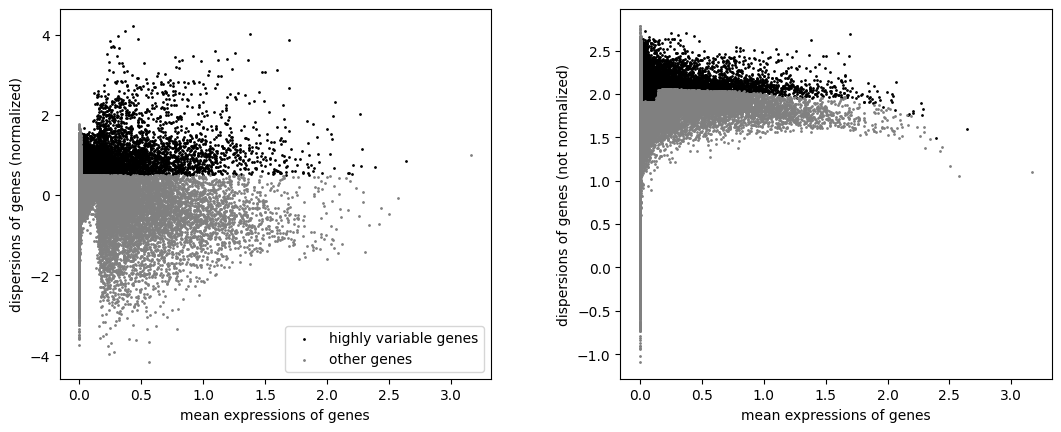

In [96]:
sc.pp.highly_variable_genes(adata_velm, batch_key='region')
sc.pl.highly_variable_genes(adata_velm)

In [97]:
sc.pp.neighbors(adata_velm)
sc.tl.pca(adata_velm)
sc.tl.umap(adata_velm)

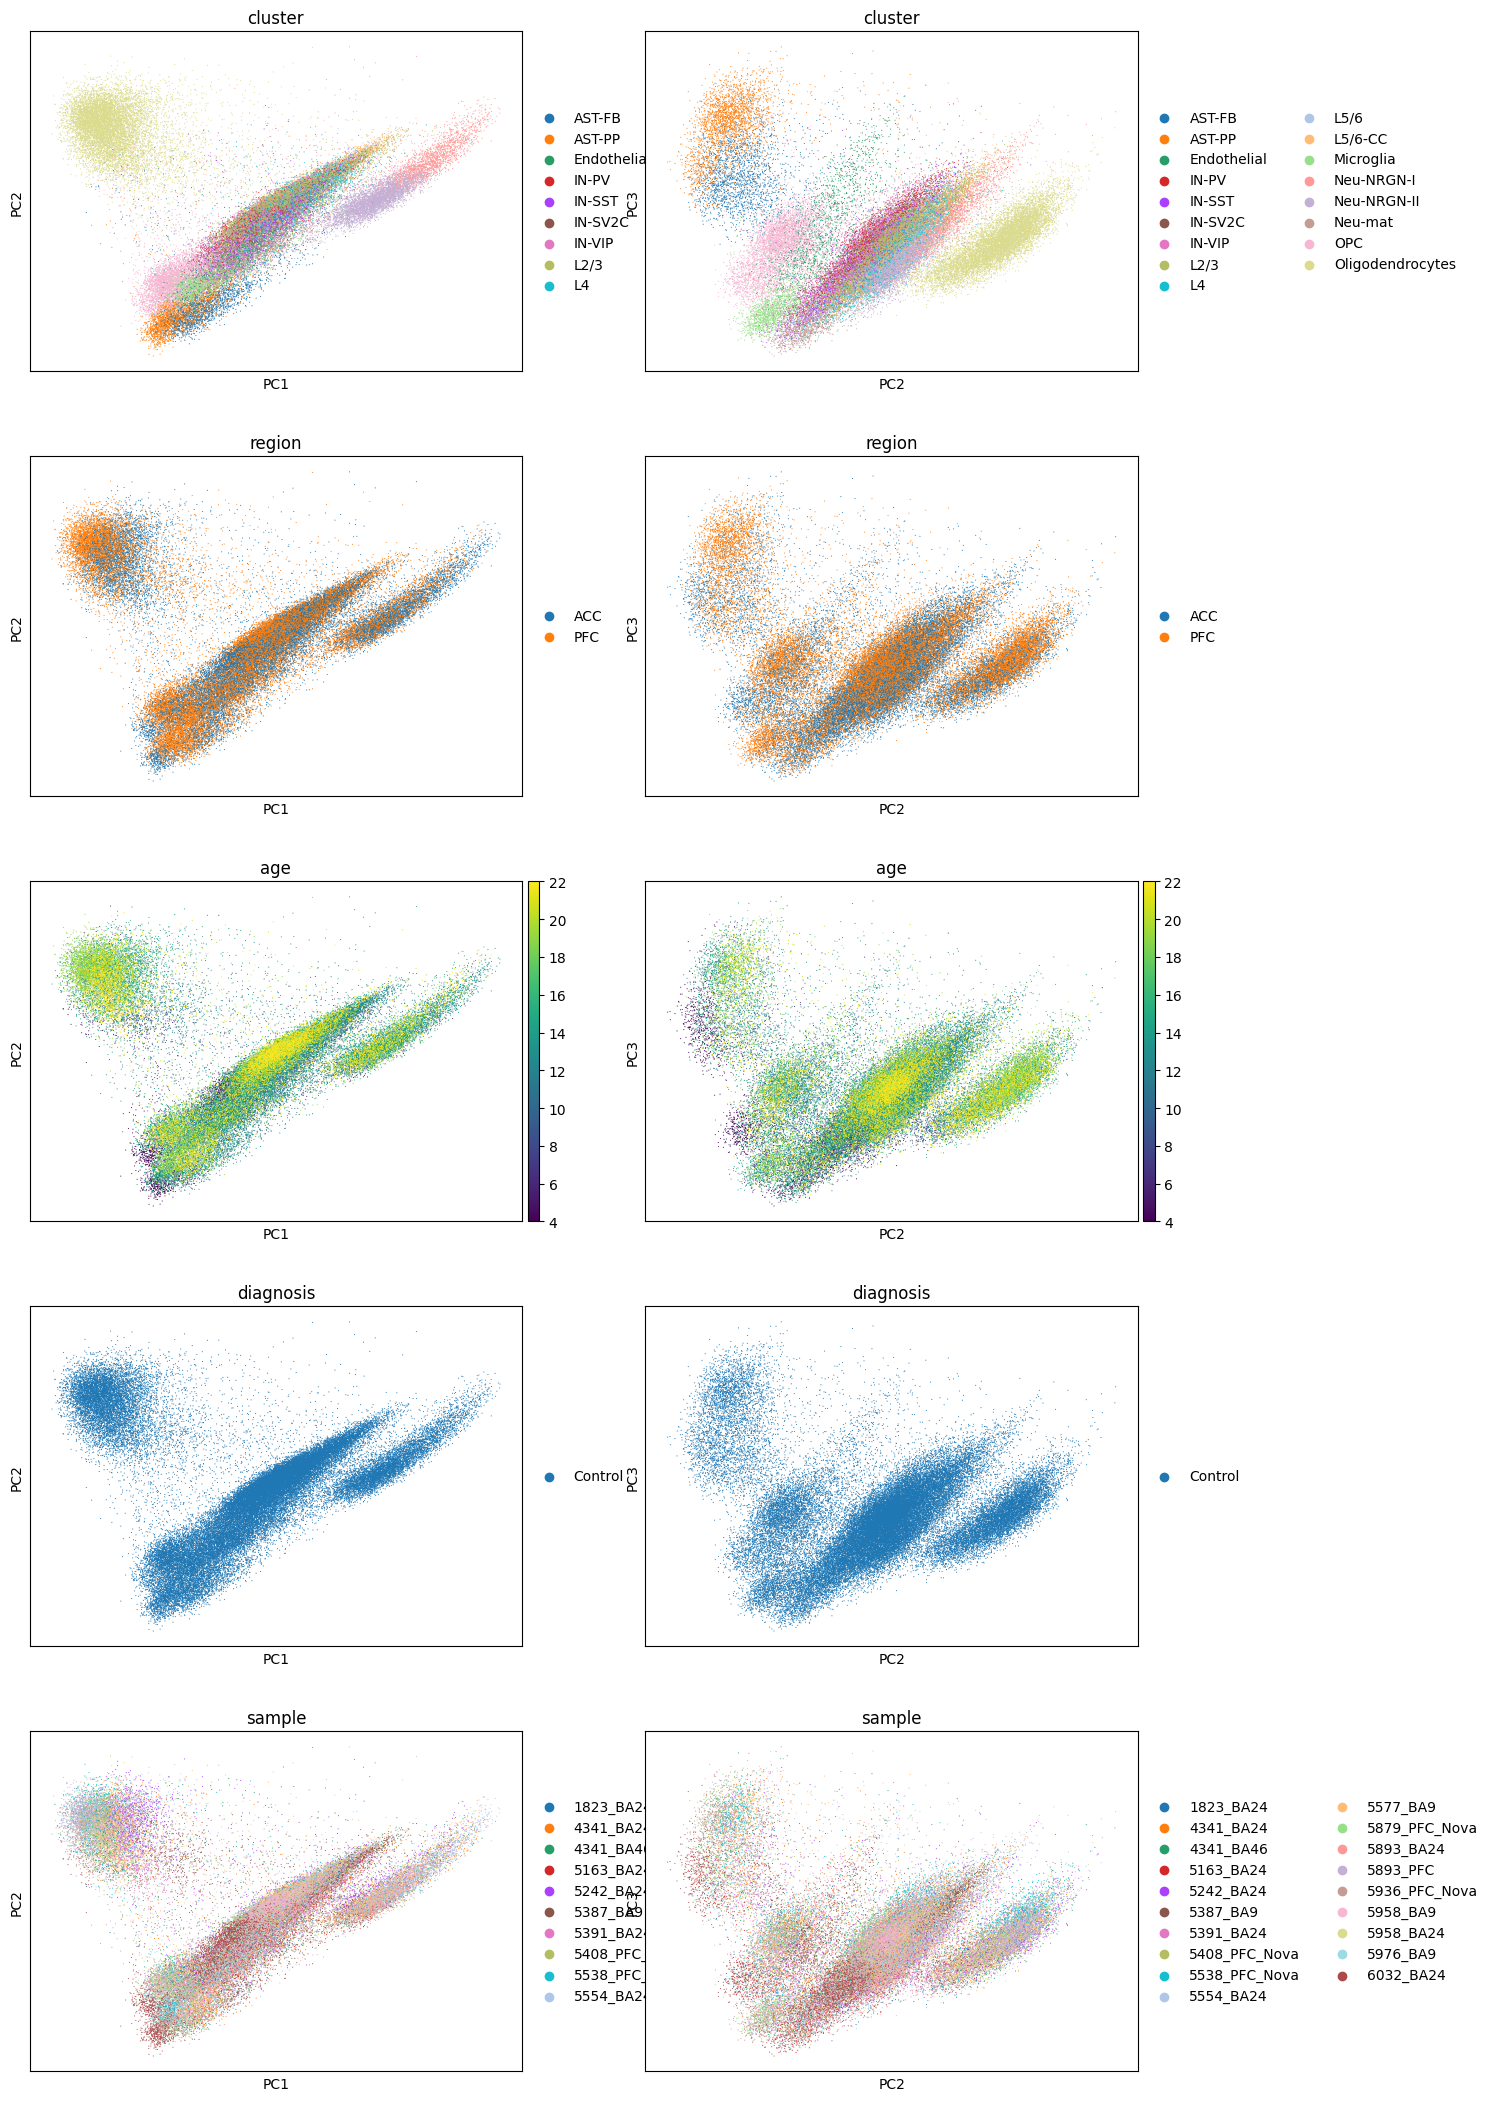

In [98]:
sc.pl.pca(adata_velm, color=['cluster', 'region', 'age', 'diagnosis', 'sample'], components=['1,2', '2,3'], ncols=2)

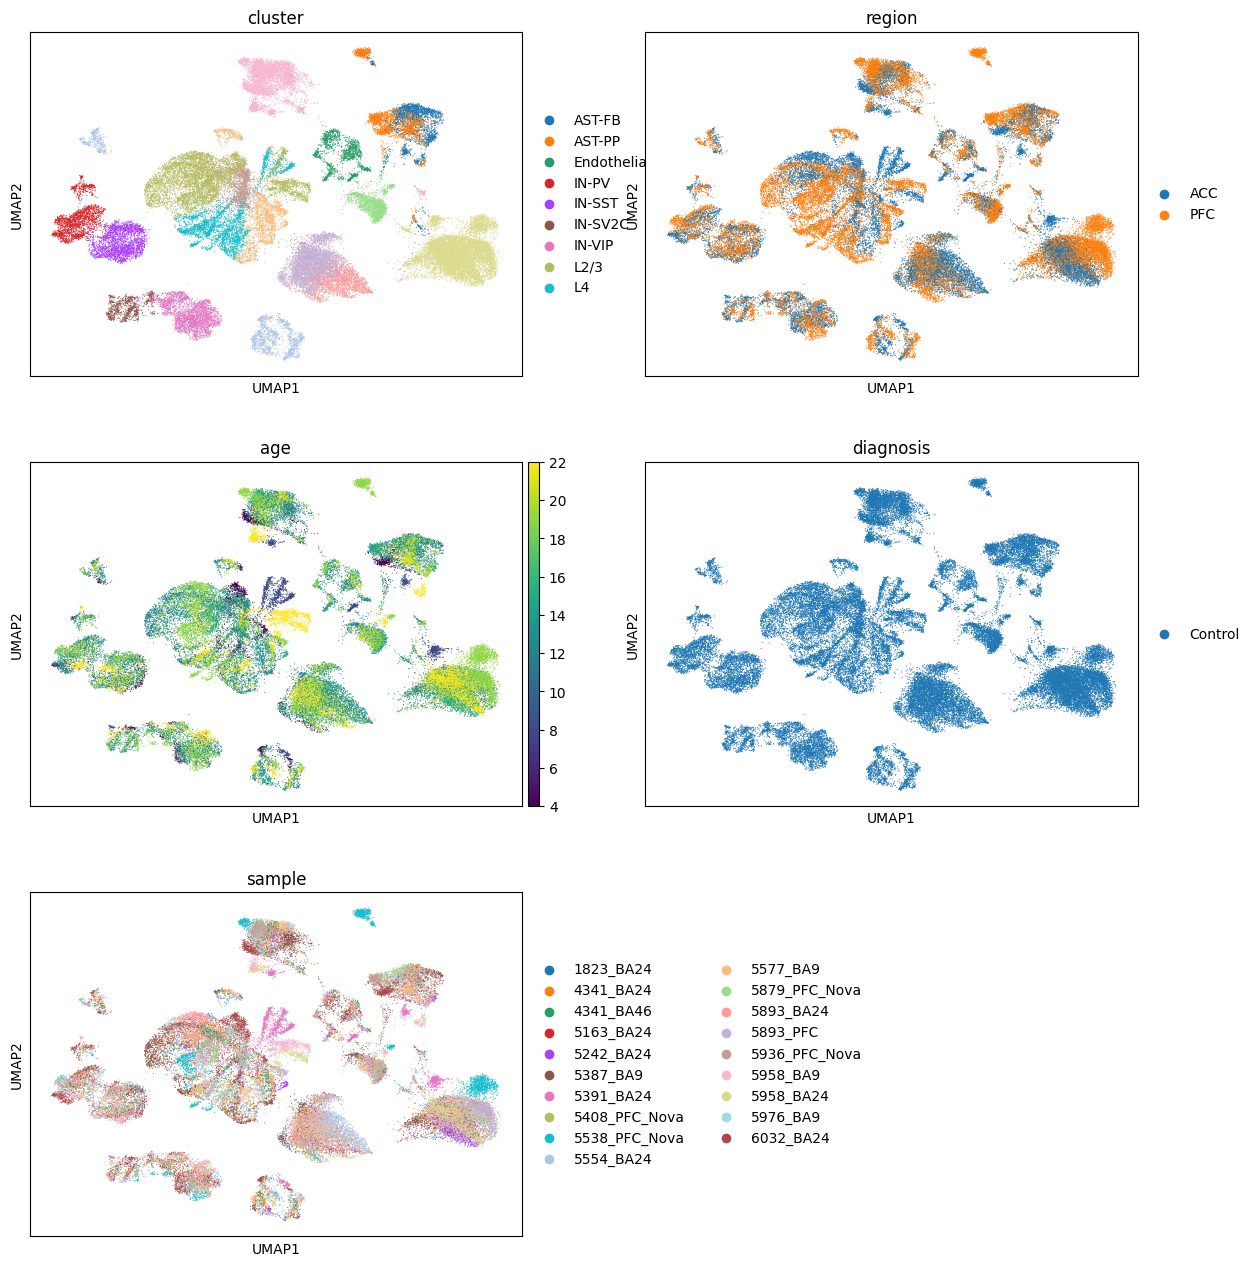

In [99]:
sc.pl.umap(adata_velm, color=['cluster', 'region', 'age', 'diagnosis', 'sample'], ncols=2)

In [100]:
adata_velm.write_h5ad("results/adata_velm_umap.h5ad")

# Preprocess

## Filter

In [101]:
sc.pp.filter_genes(adata_pb, min_counts=100)
sc.pp.filter_genes(adata_pb, min_cells=20)

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\preprocessing\_simple.py:273: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_counts"] = number


In [102]:
adata_pb

AnnData object with n_obs × n_vars = 167 × 15922
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'n_counts', 'n_cells'
    layers: 'psbulk_props'

## Normalize

In [103]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

Highly variable genes: 3986


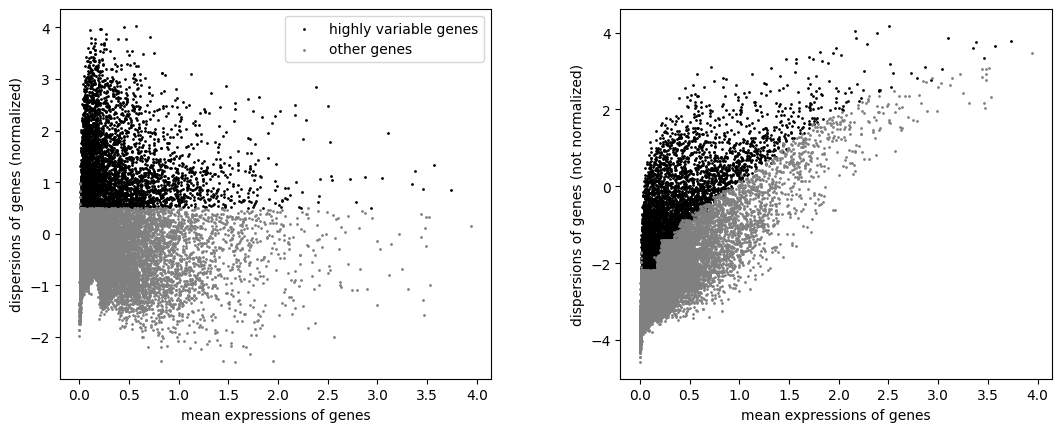

In [104]:
sc.pp.highly_variable_genes(adata_pb, batch_key='region', max_mean=5)
print("Highly variable genes: %d"%sum(adata_pb.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata_pb)

## Visualize

In [105]:
sc.tl.pca(adata_pb)

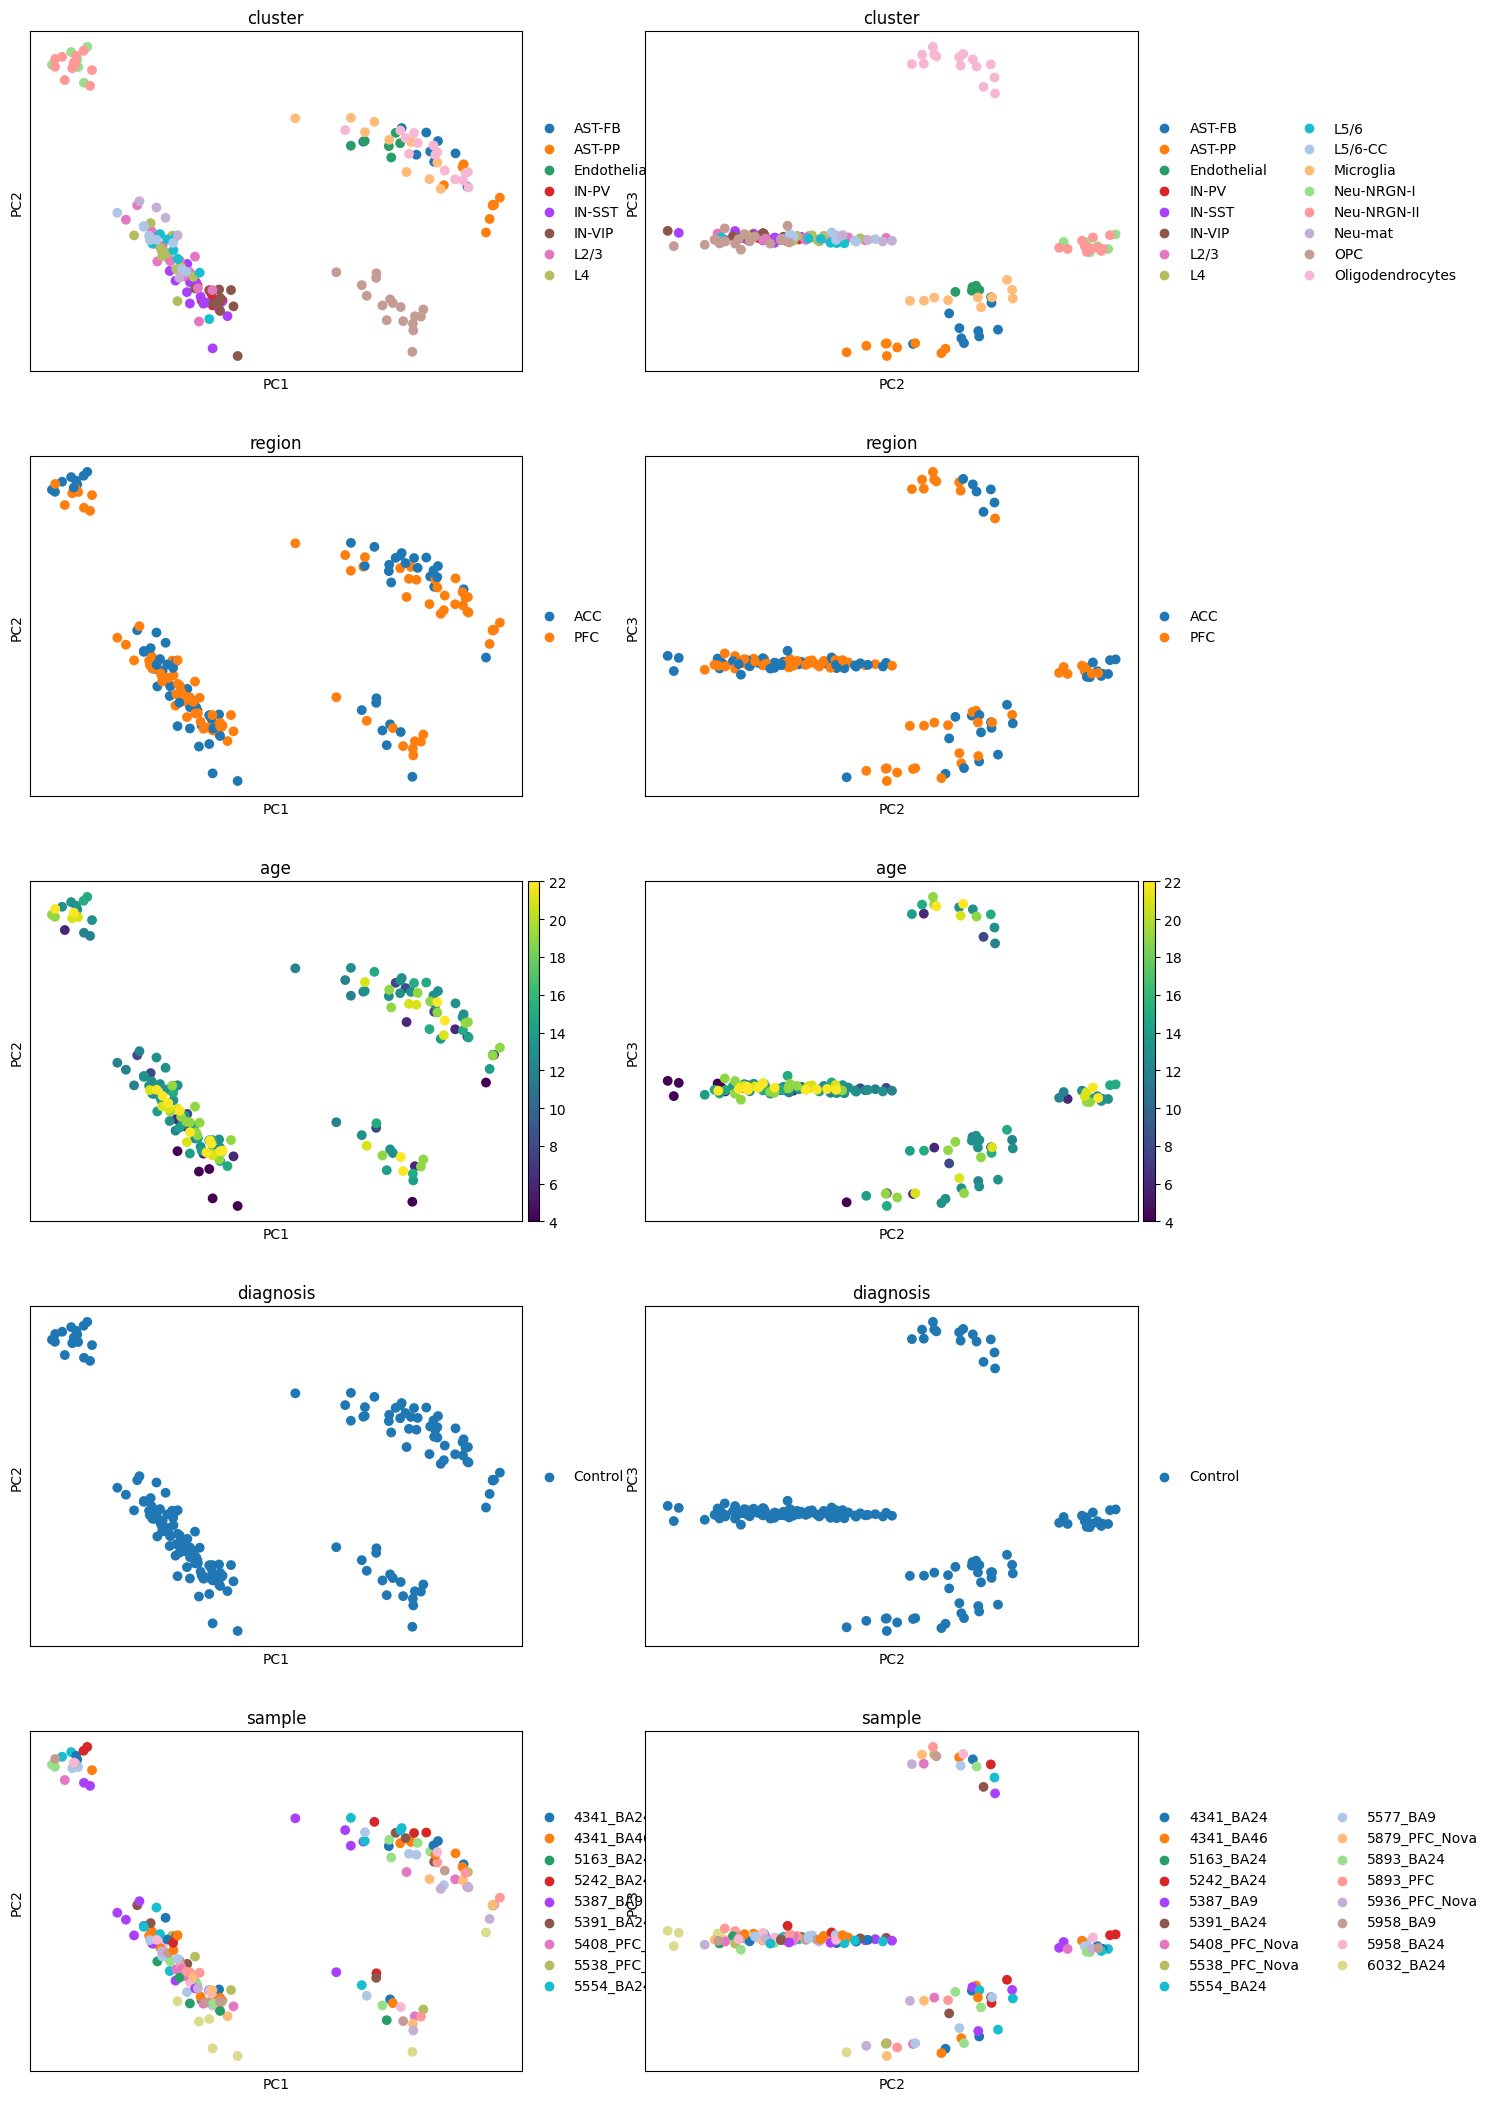

In [106]:
sc.pl.pca(adata_pb, color=['cluster', 'region', 'age', 'diagnosis', 'sample'], size=200, components=['1,2', '2,3'], ncols=2)

In [107]:
sc.pp.neighbors(adata_pb)
sc.tl.umap(adata_pb)

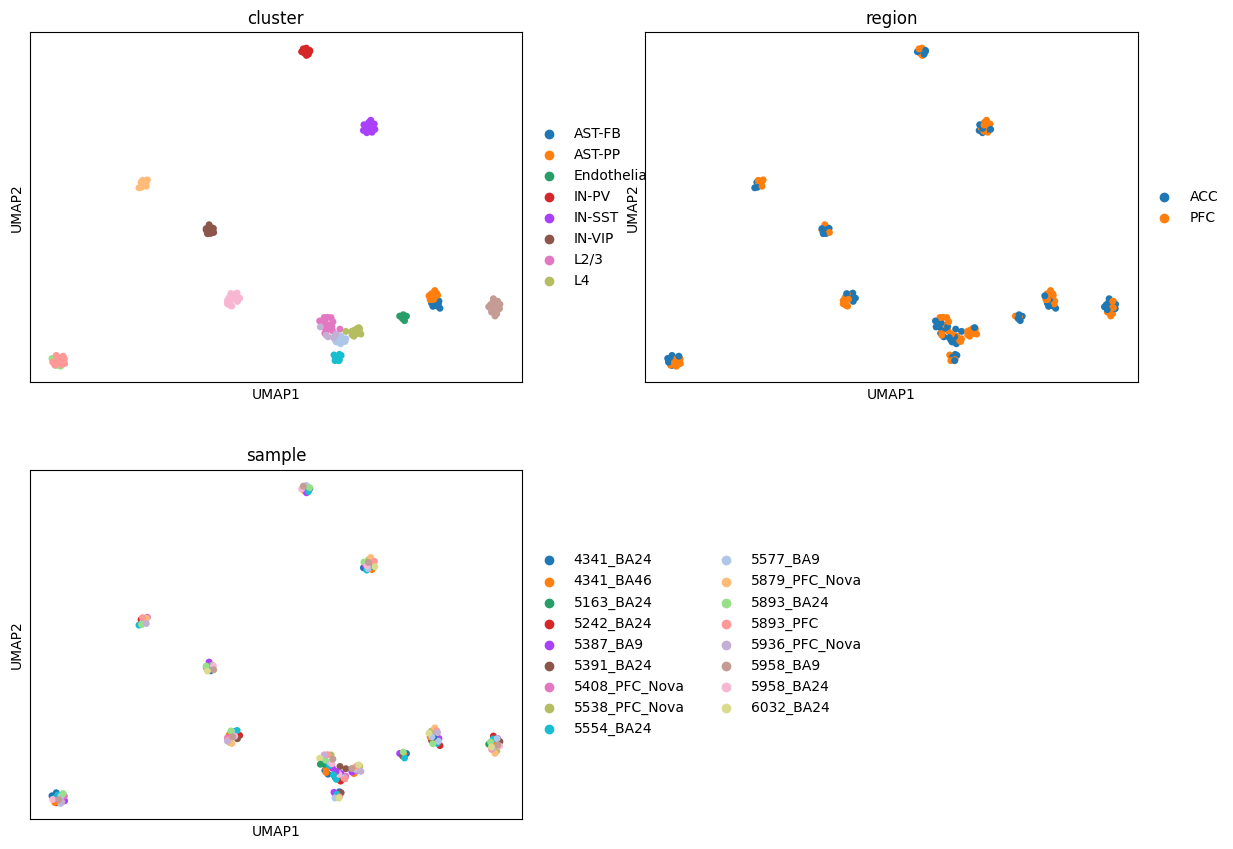

In [108]:
sc.pl.umap(adata_pb, color=['cluster', 'region', 'sample'], size=100, ncols=2)

# Rank genes

## T-test

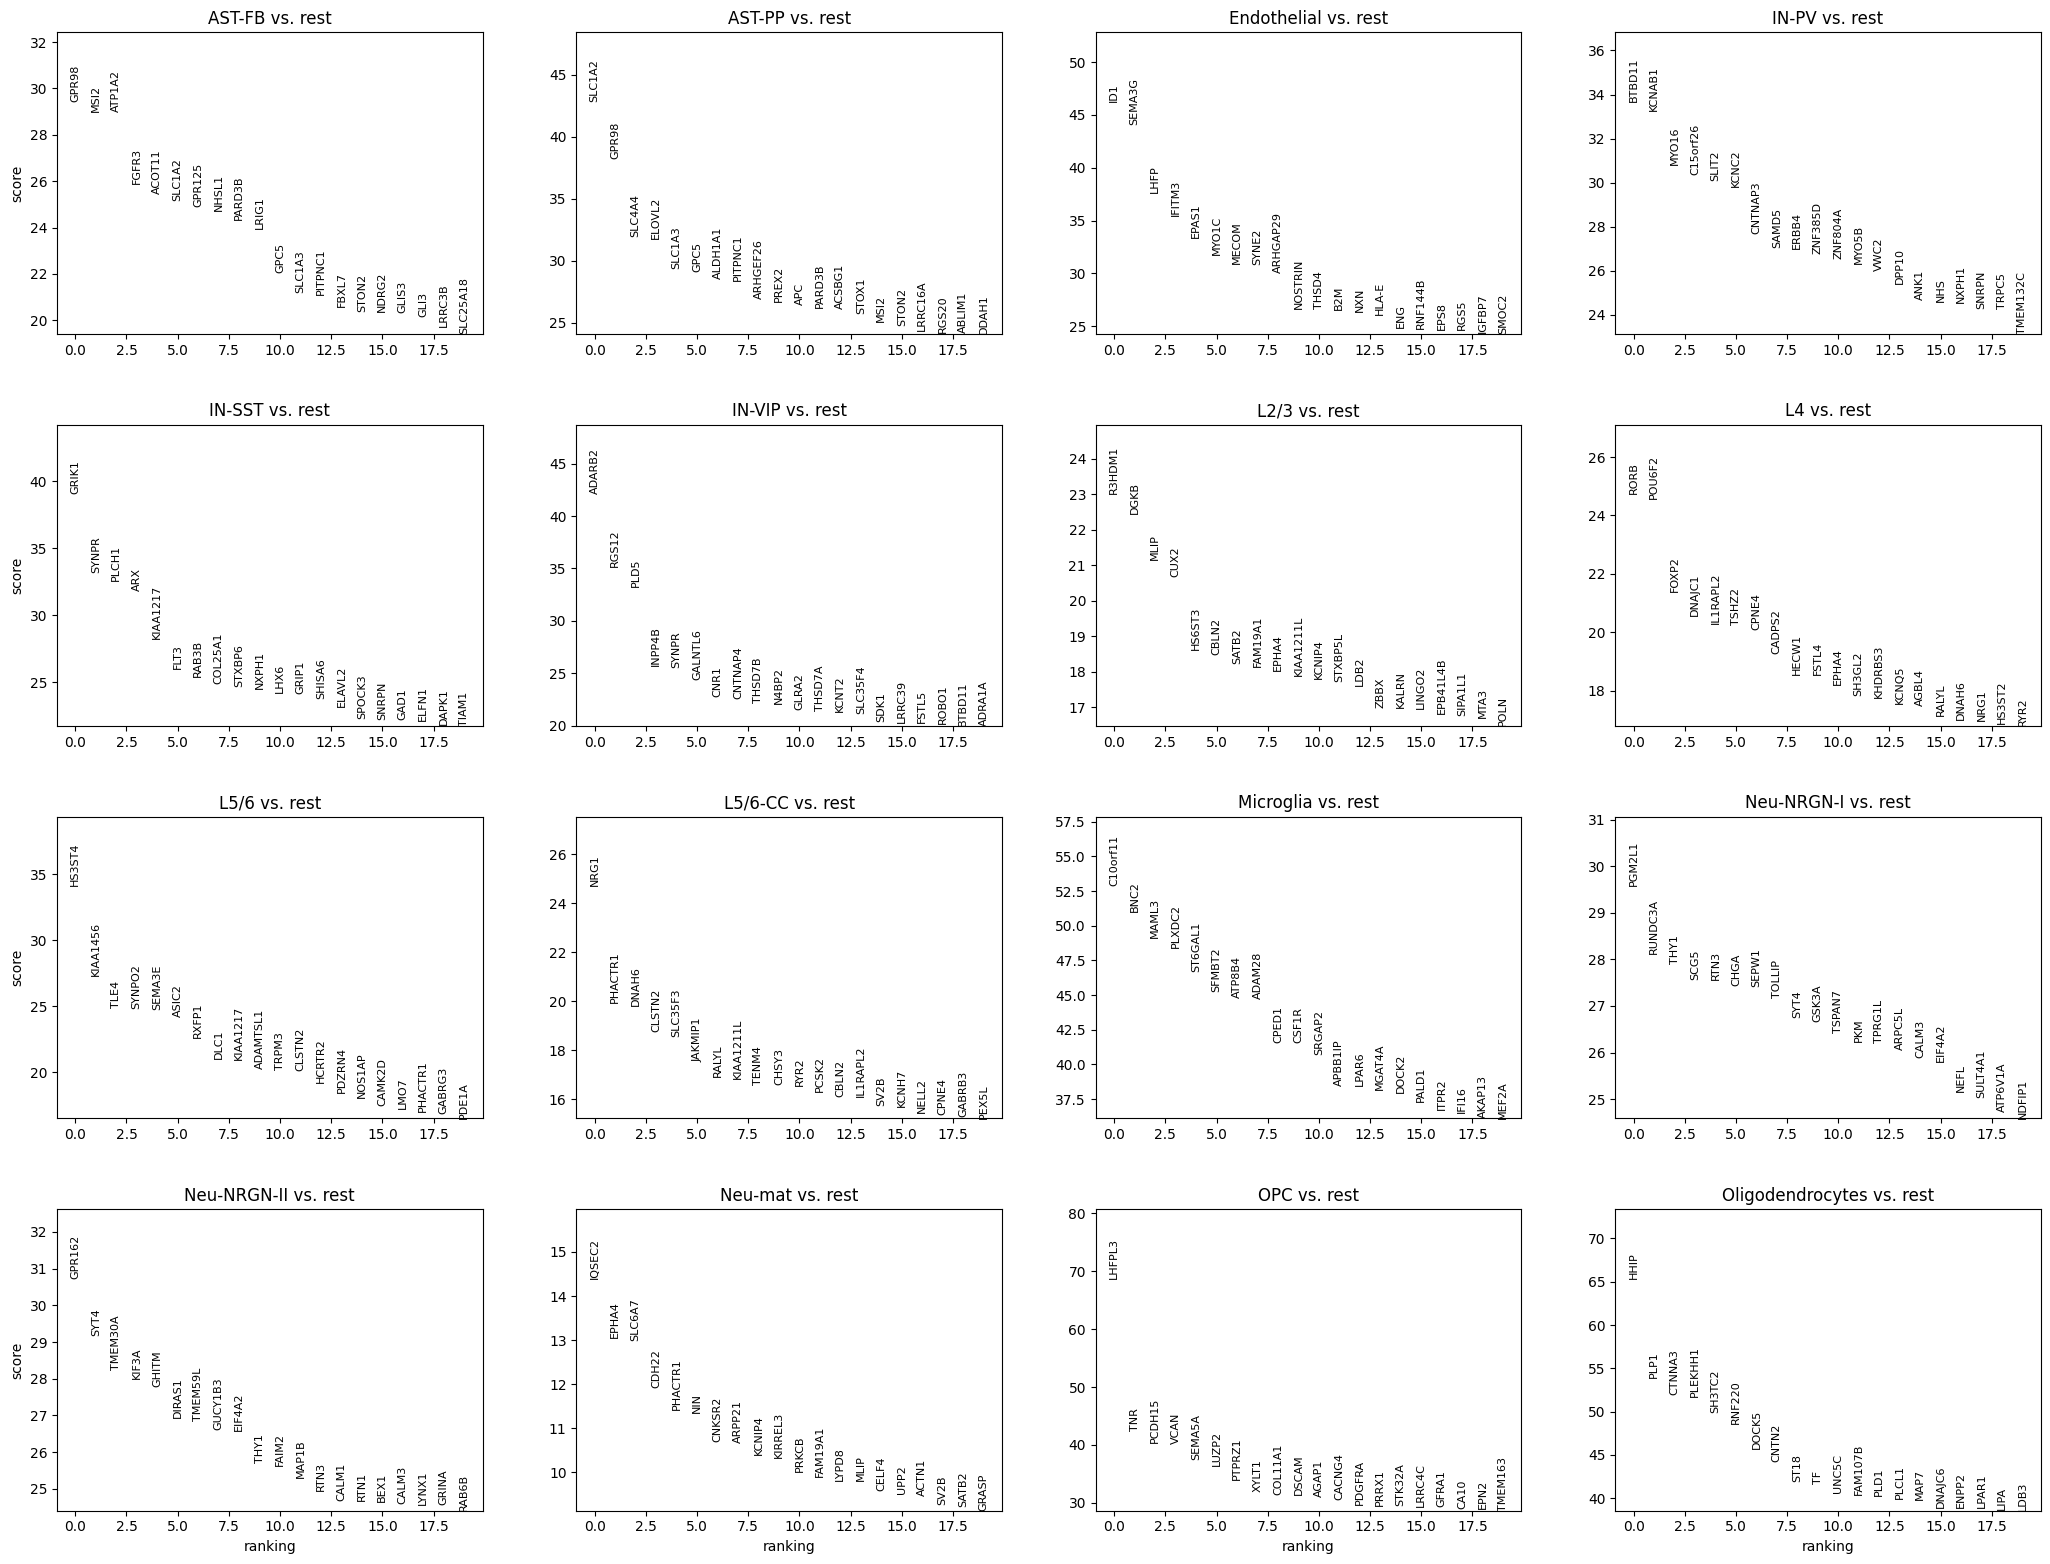

In [109]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='t-test', reference='rest', key_added="t-test", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="t-test")

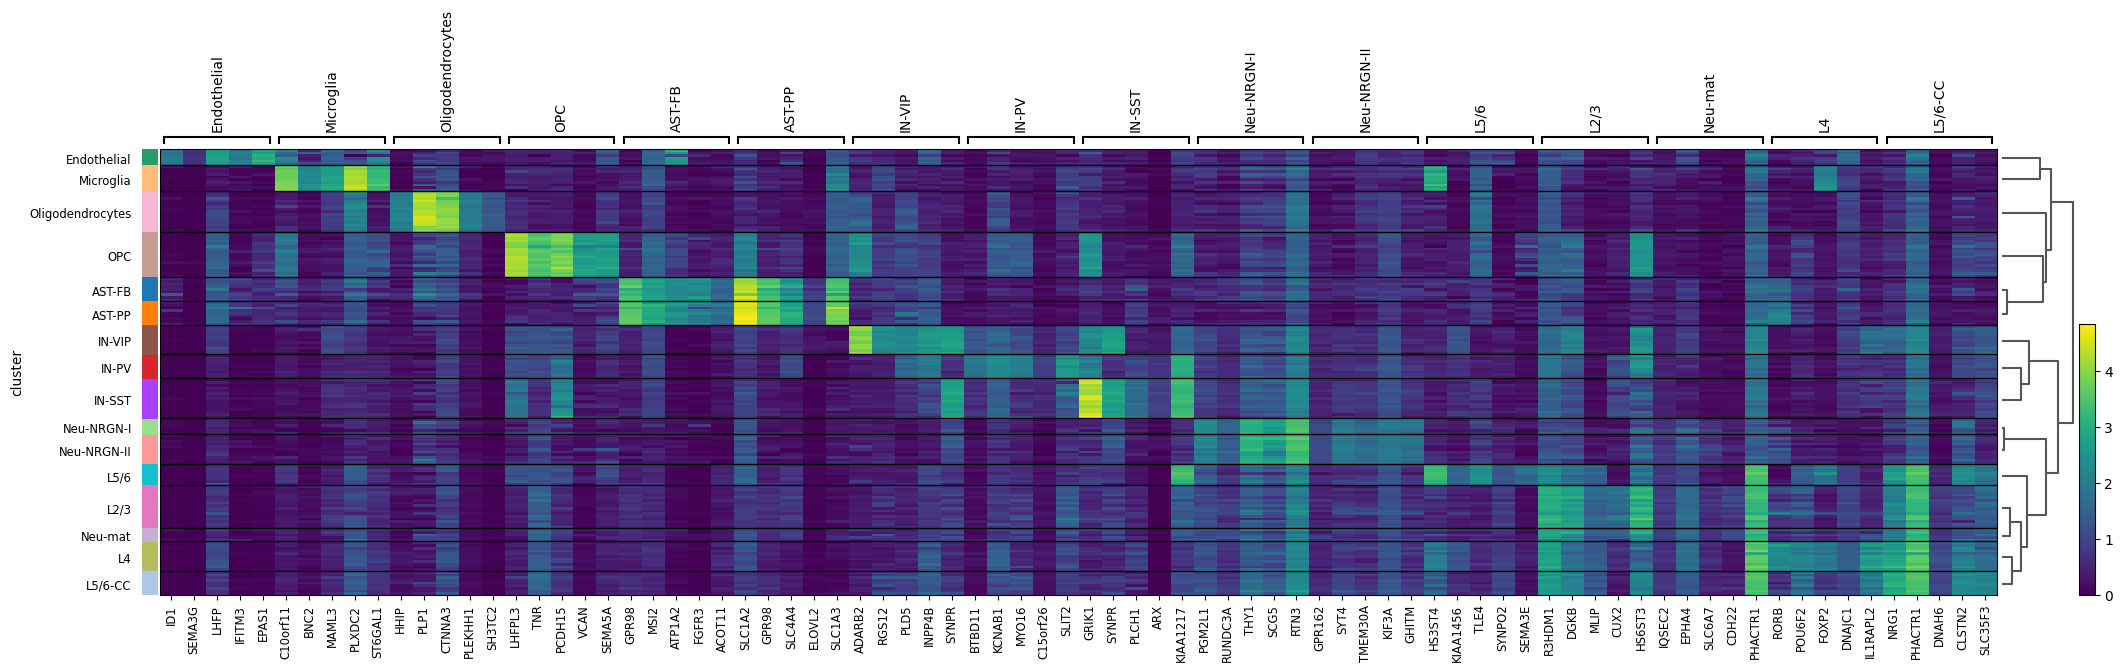

In [110]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="t-test", groupby="cluster", show_gene_labels=True)

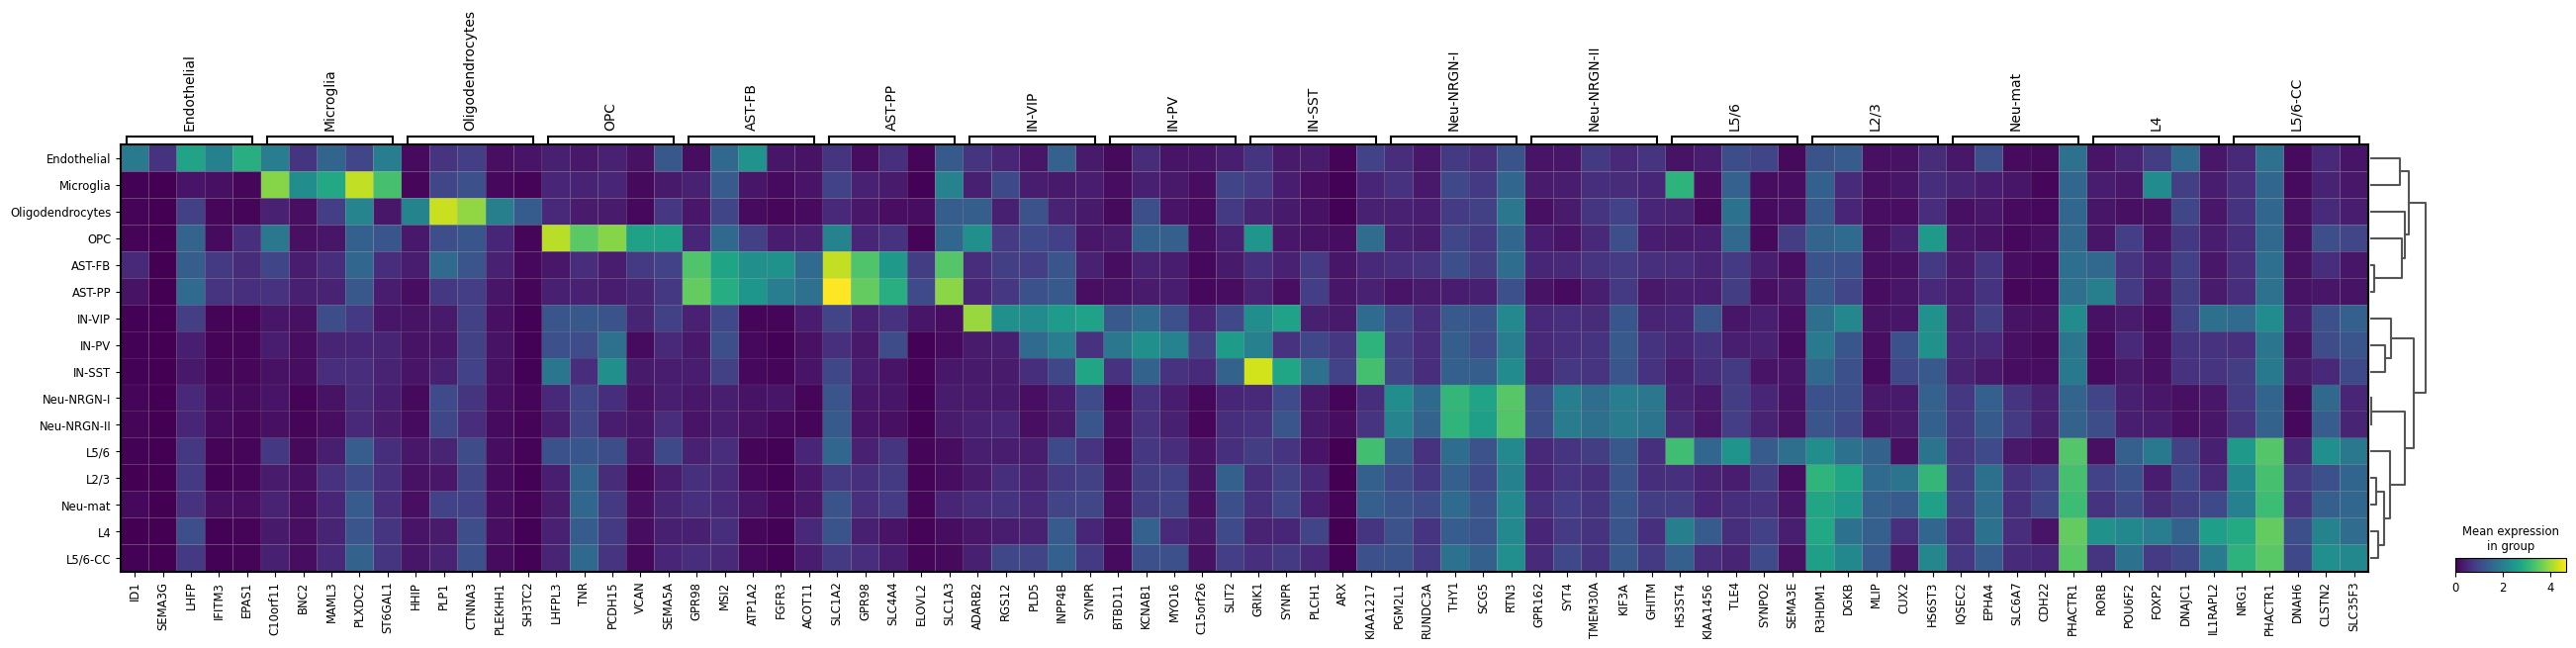

In [111]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cluster")

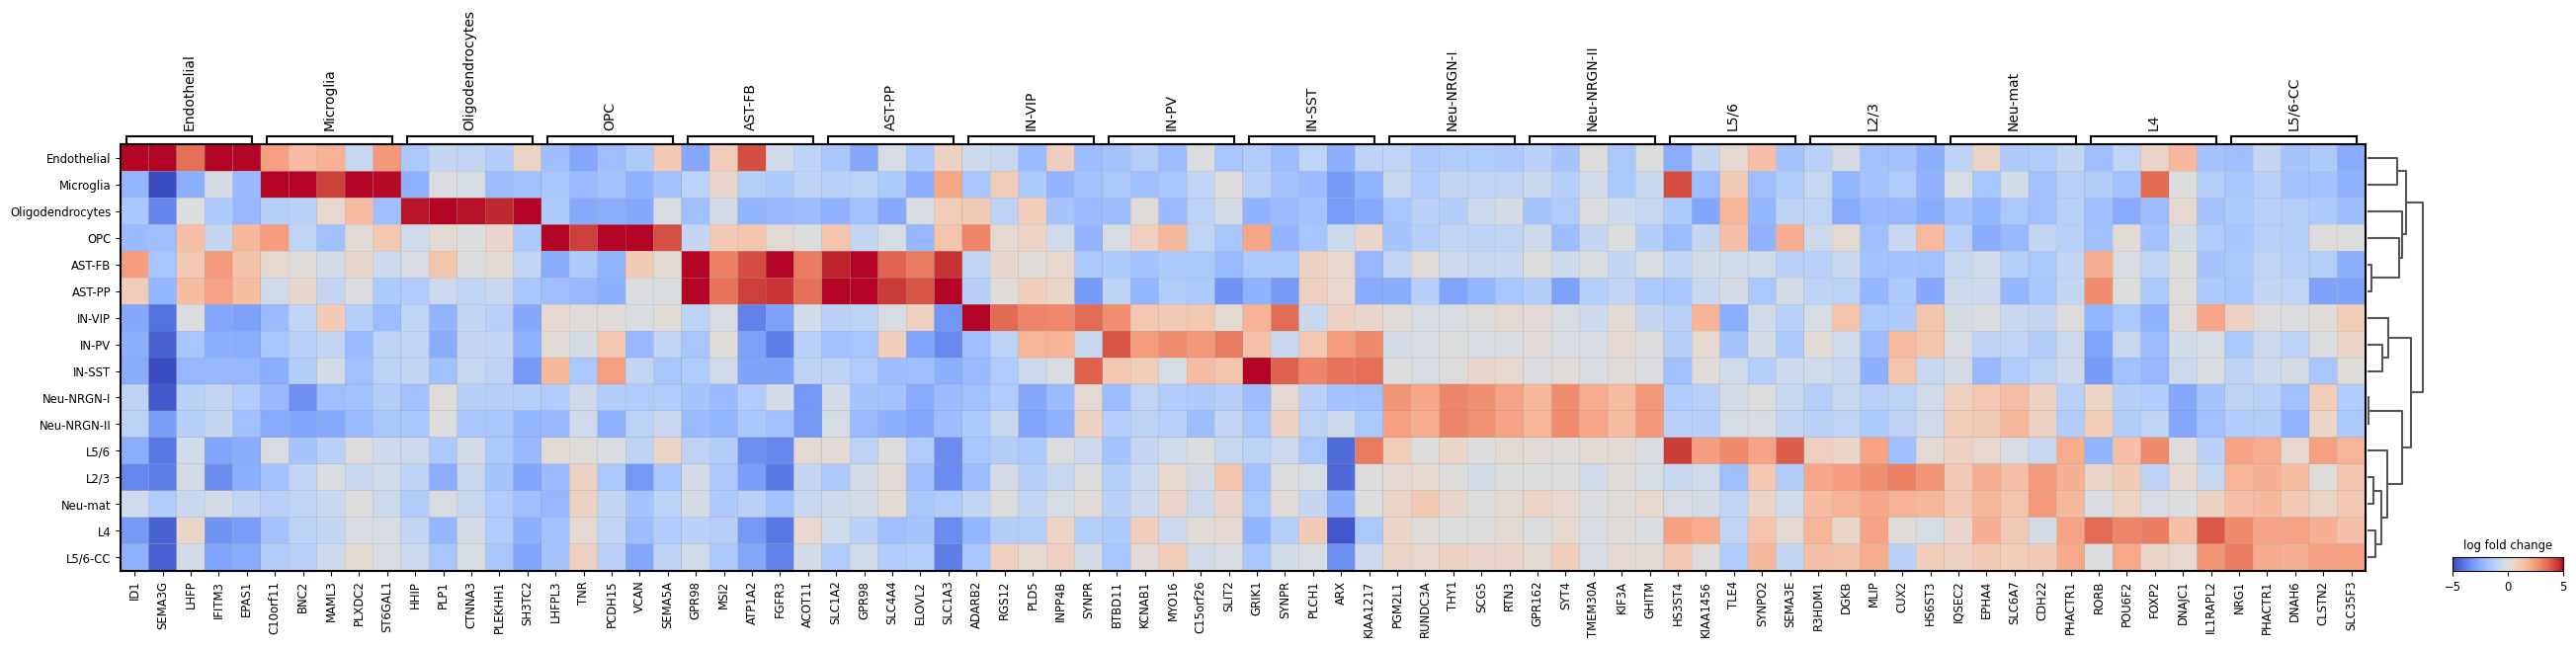

In [112]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cluster", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Wilcoxon

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\plotting\_tools\__init__.py:432: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


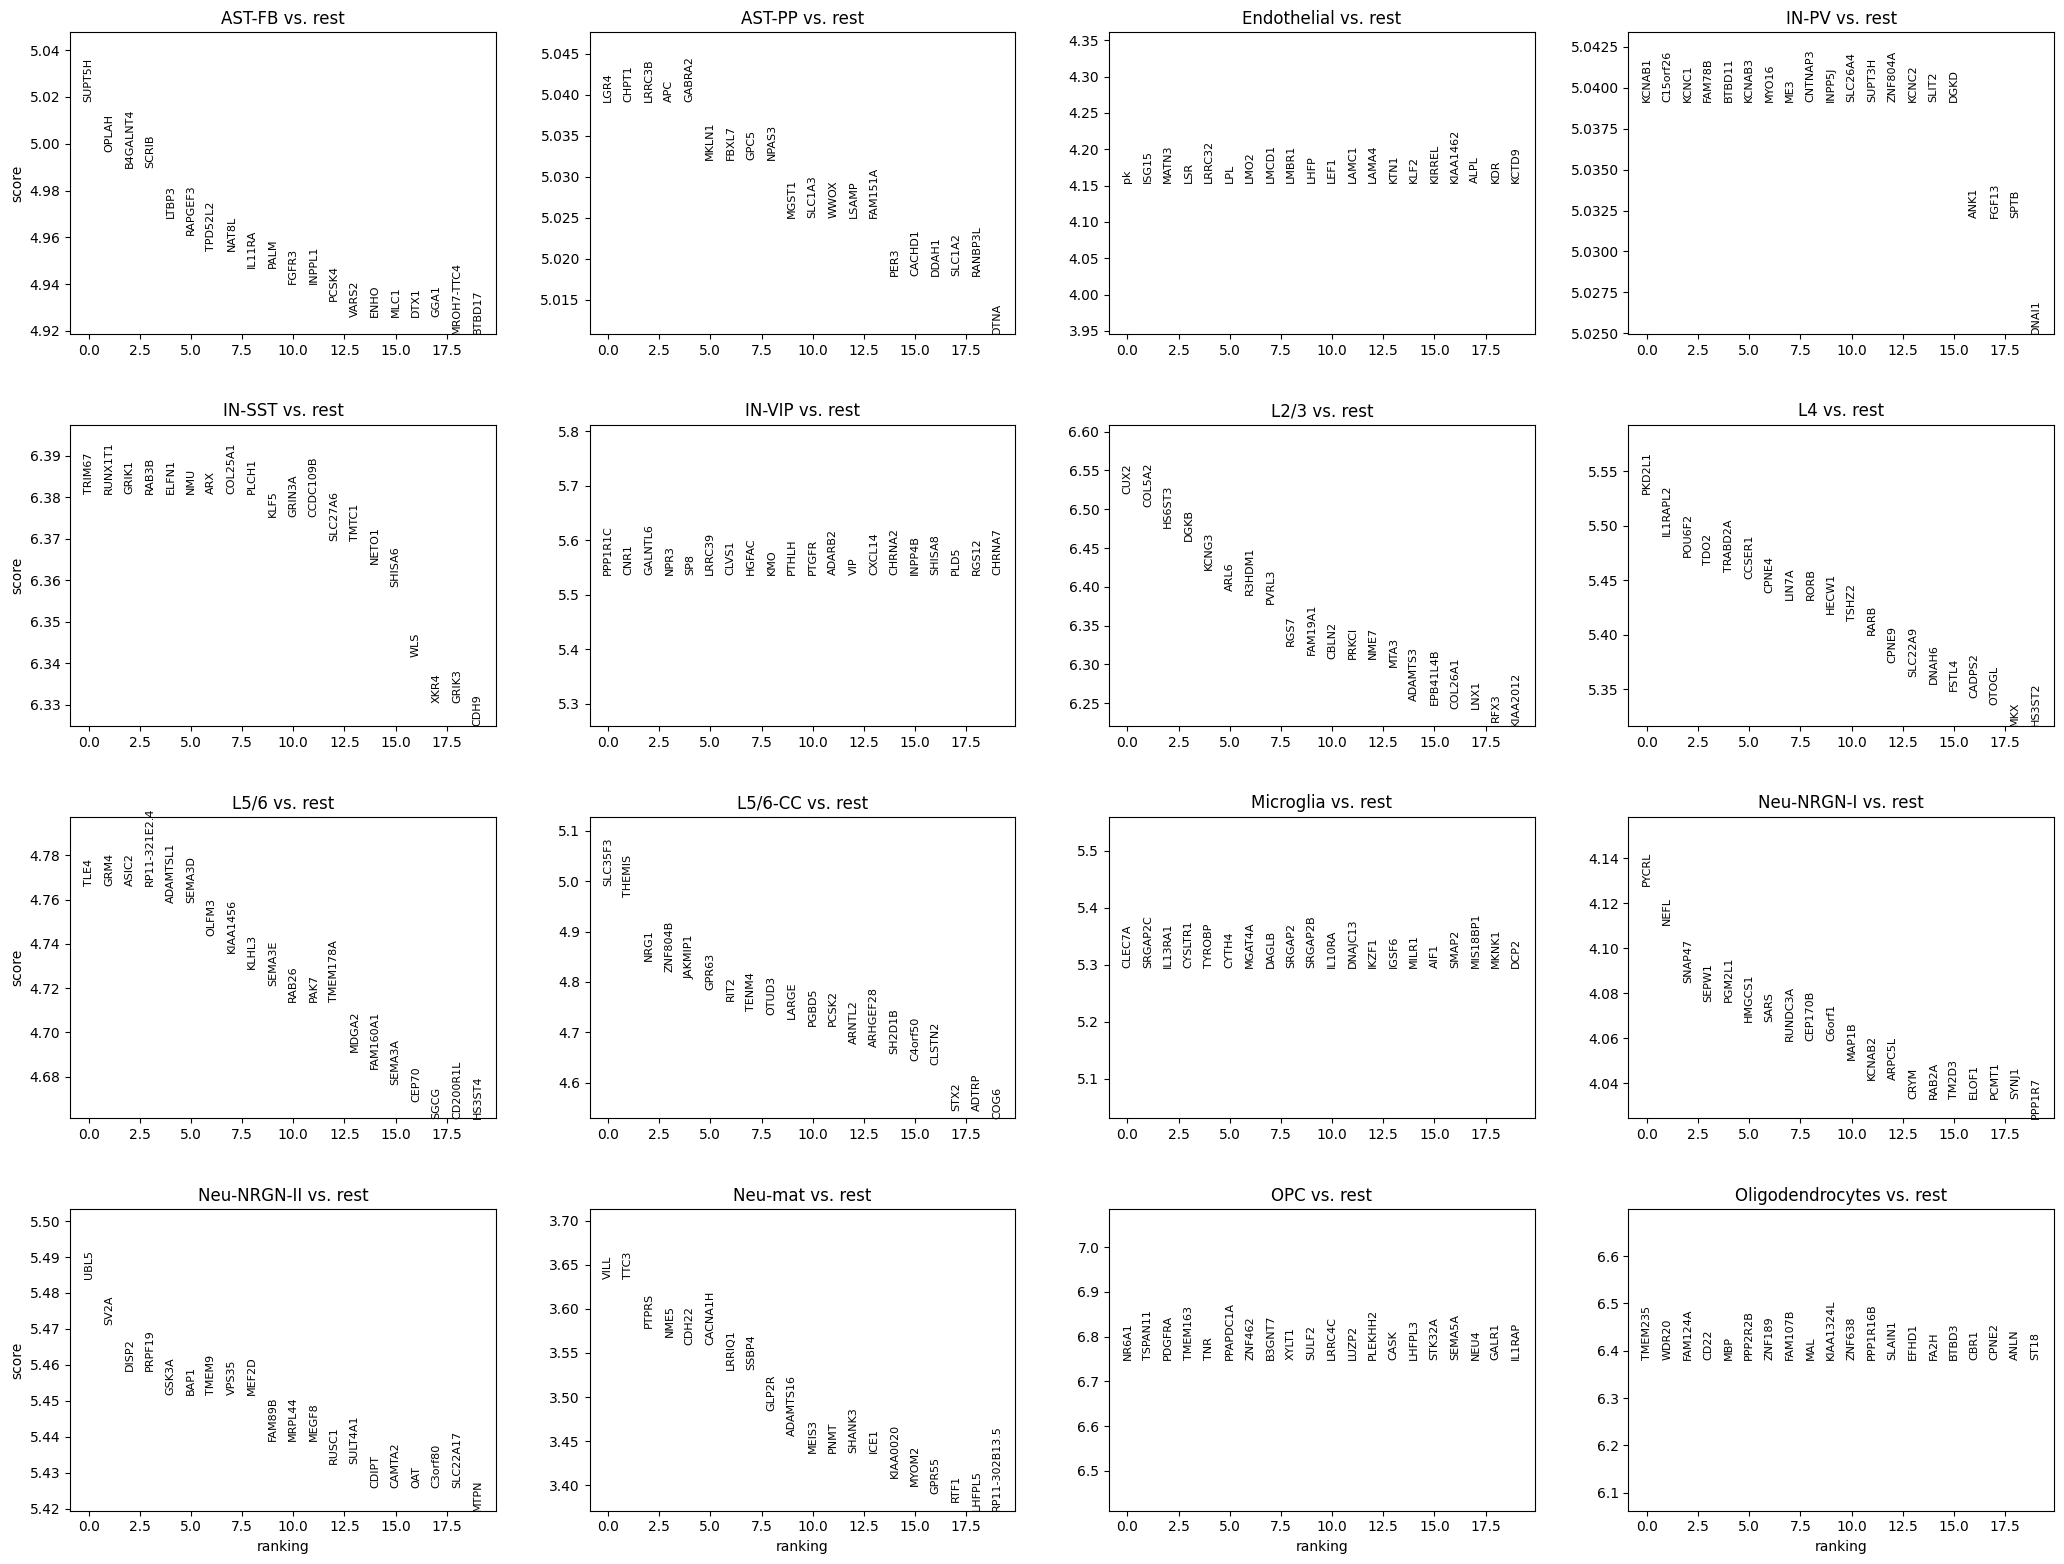

In [113]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

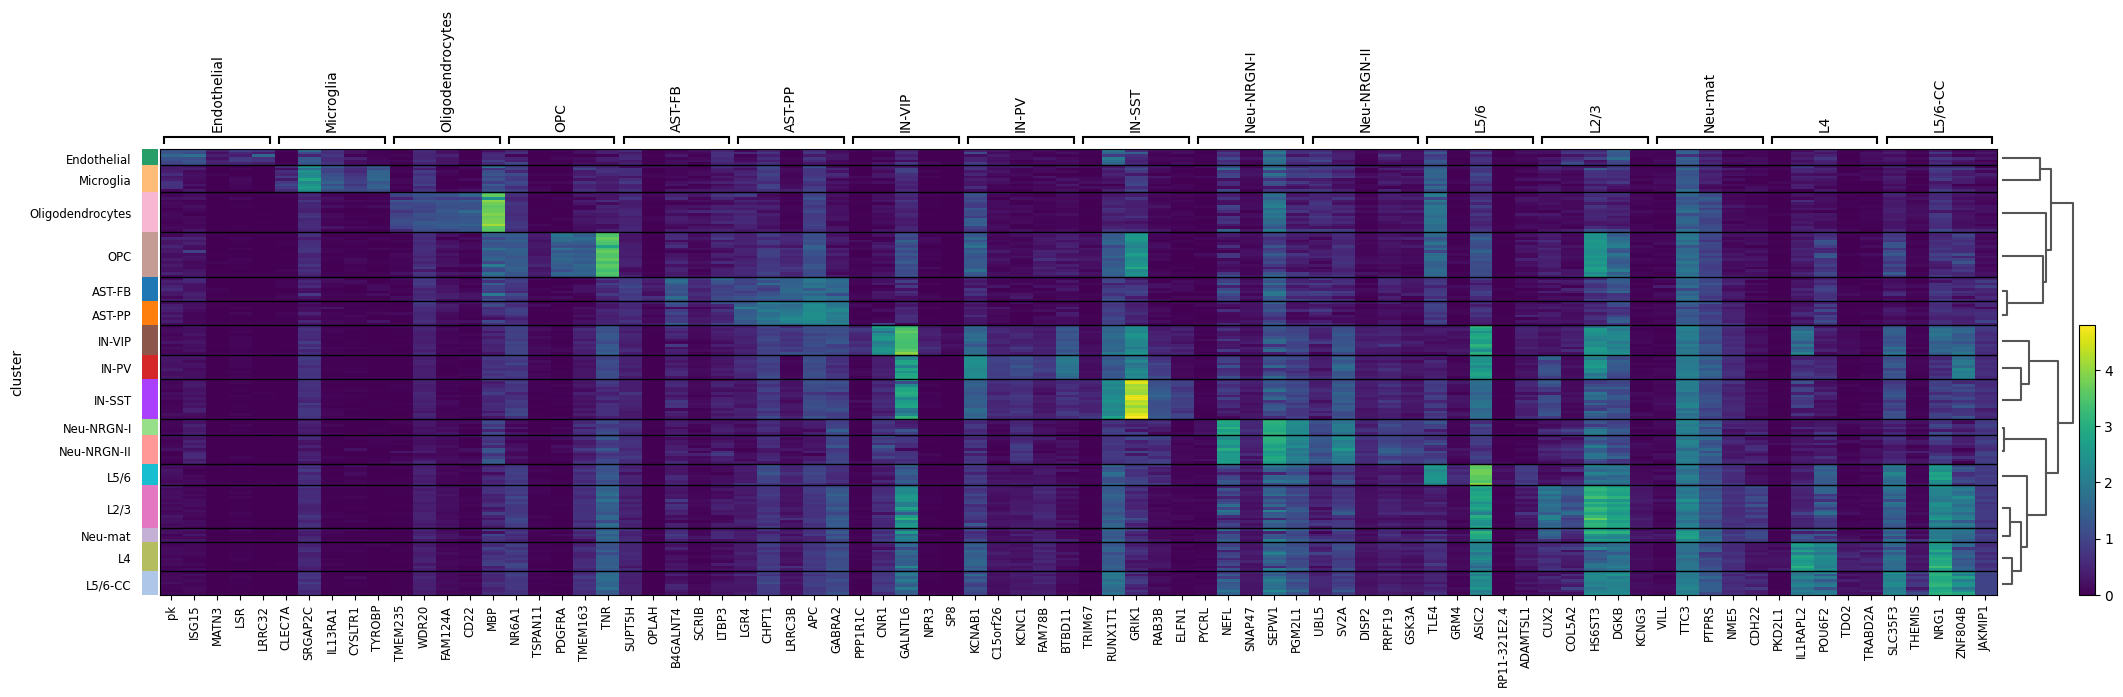

In [114]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", show_gene_labels=True)

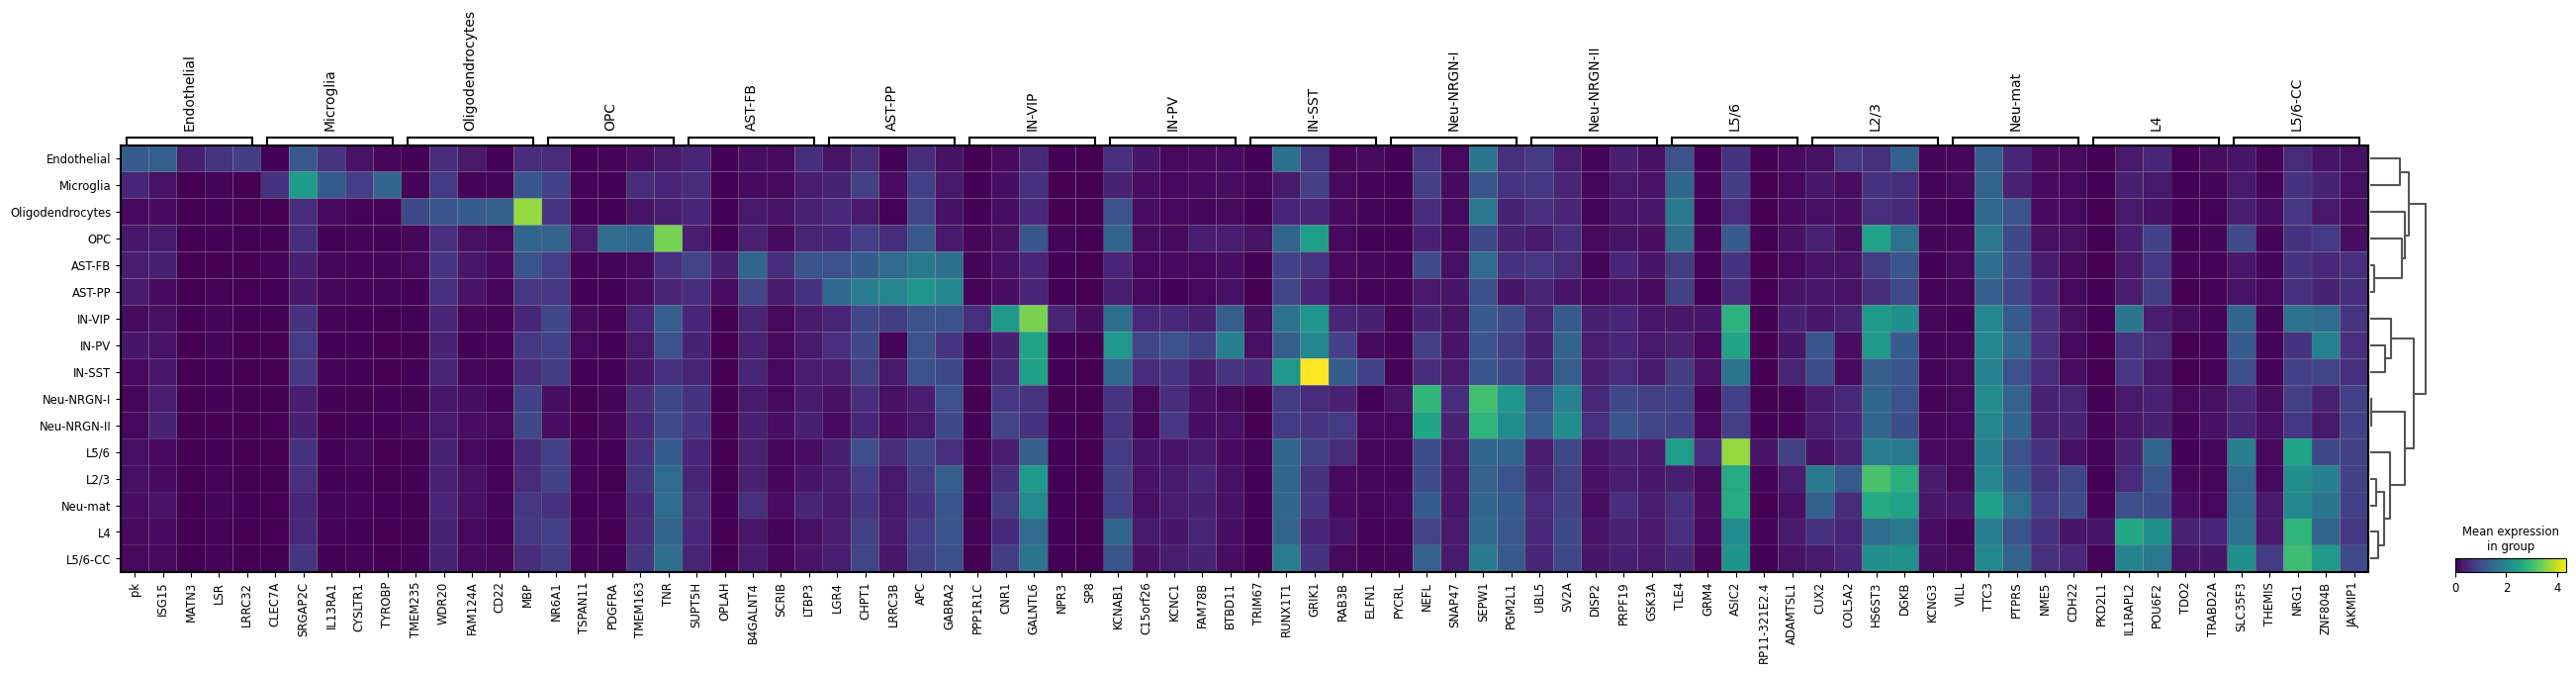

In [115]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster")

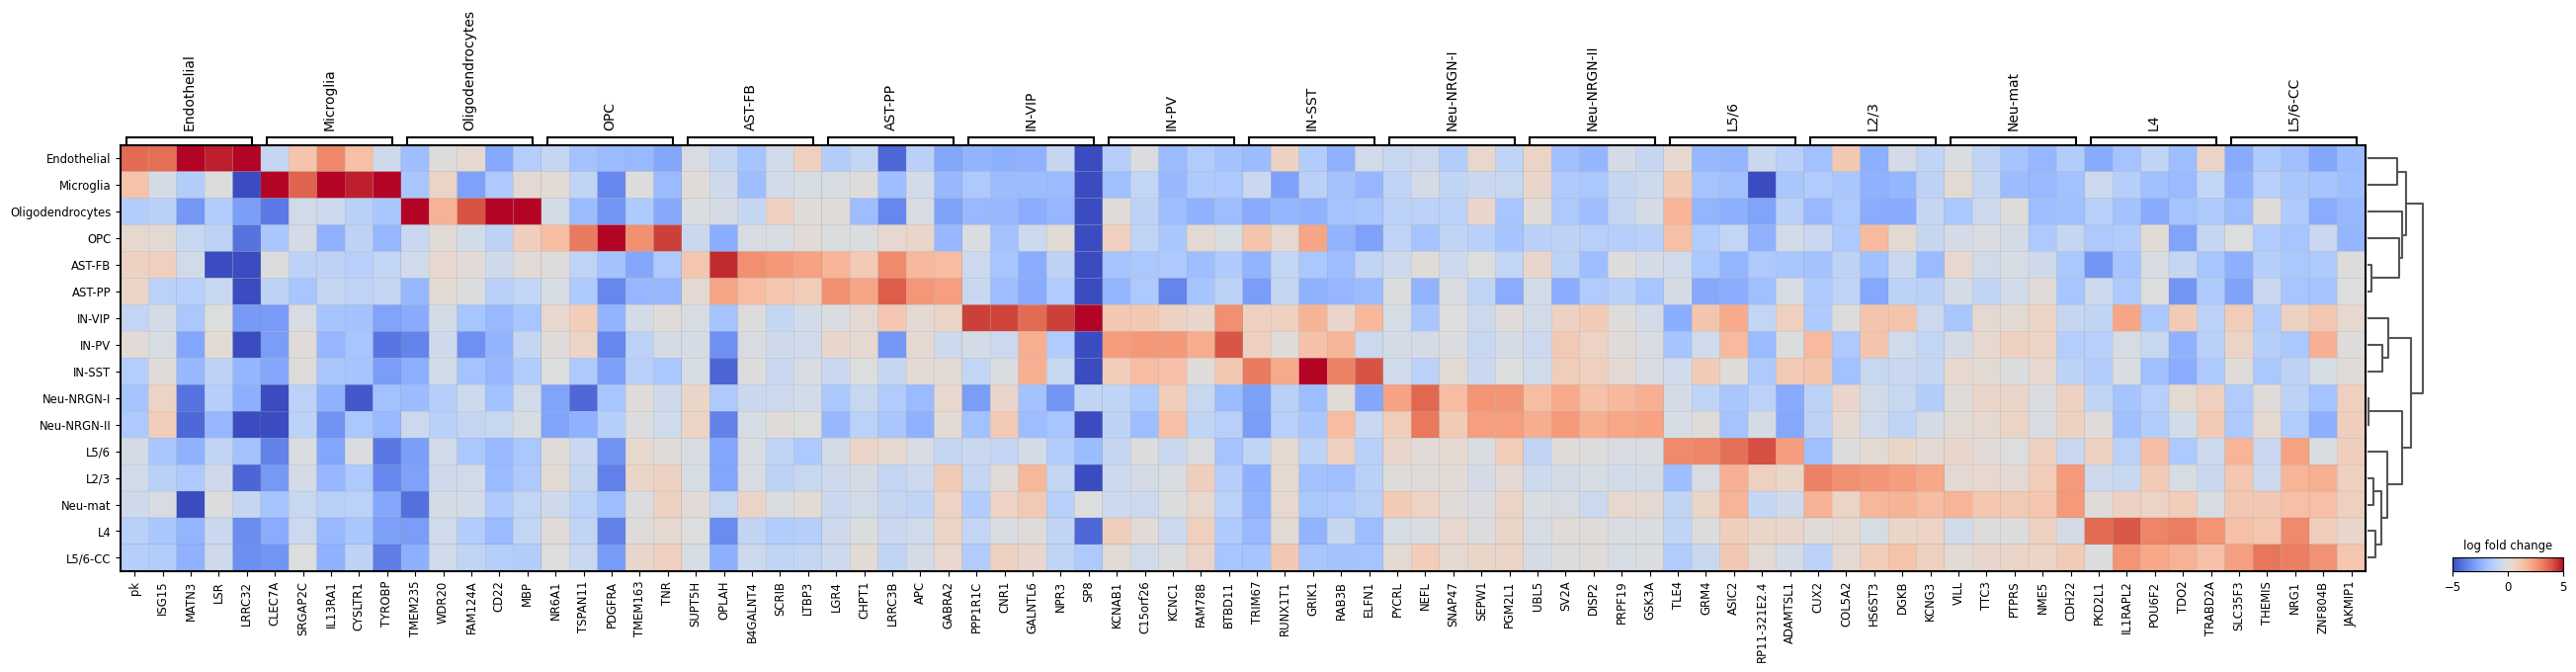

In [116]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Logreg

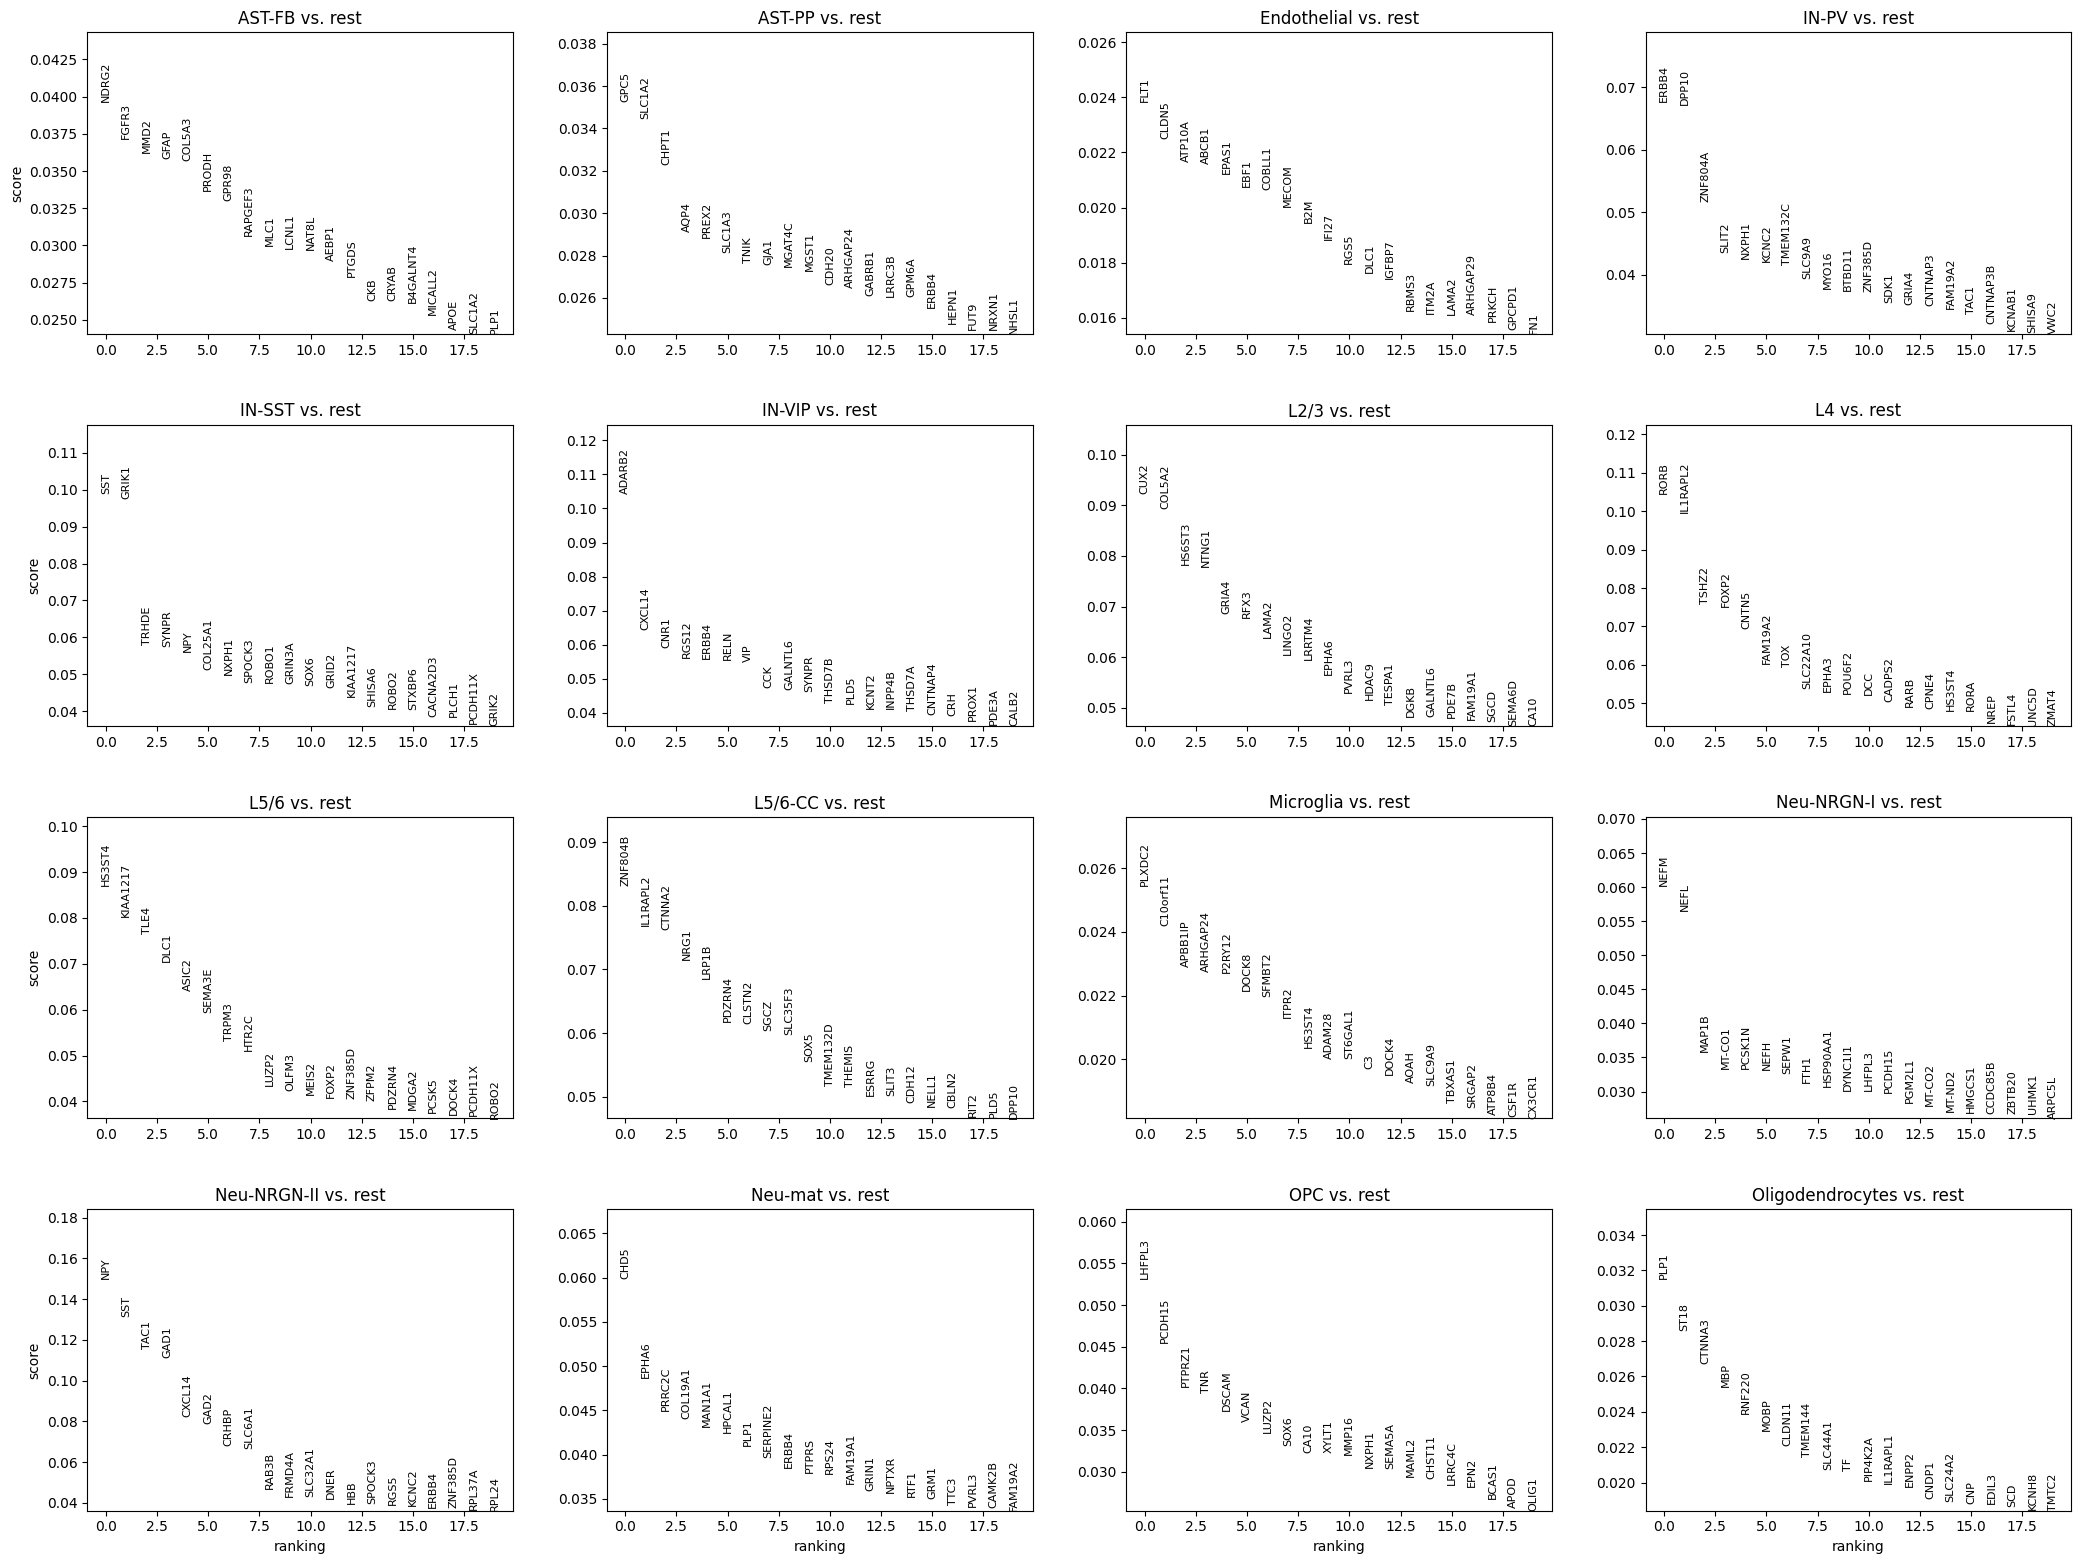

In [117]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

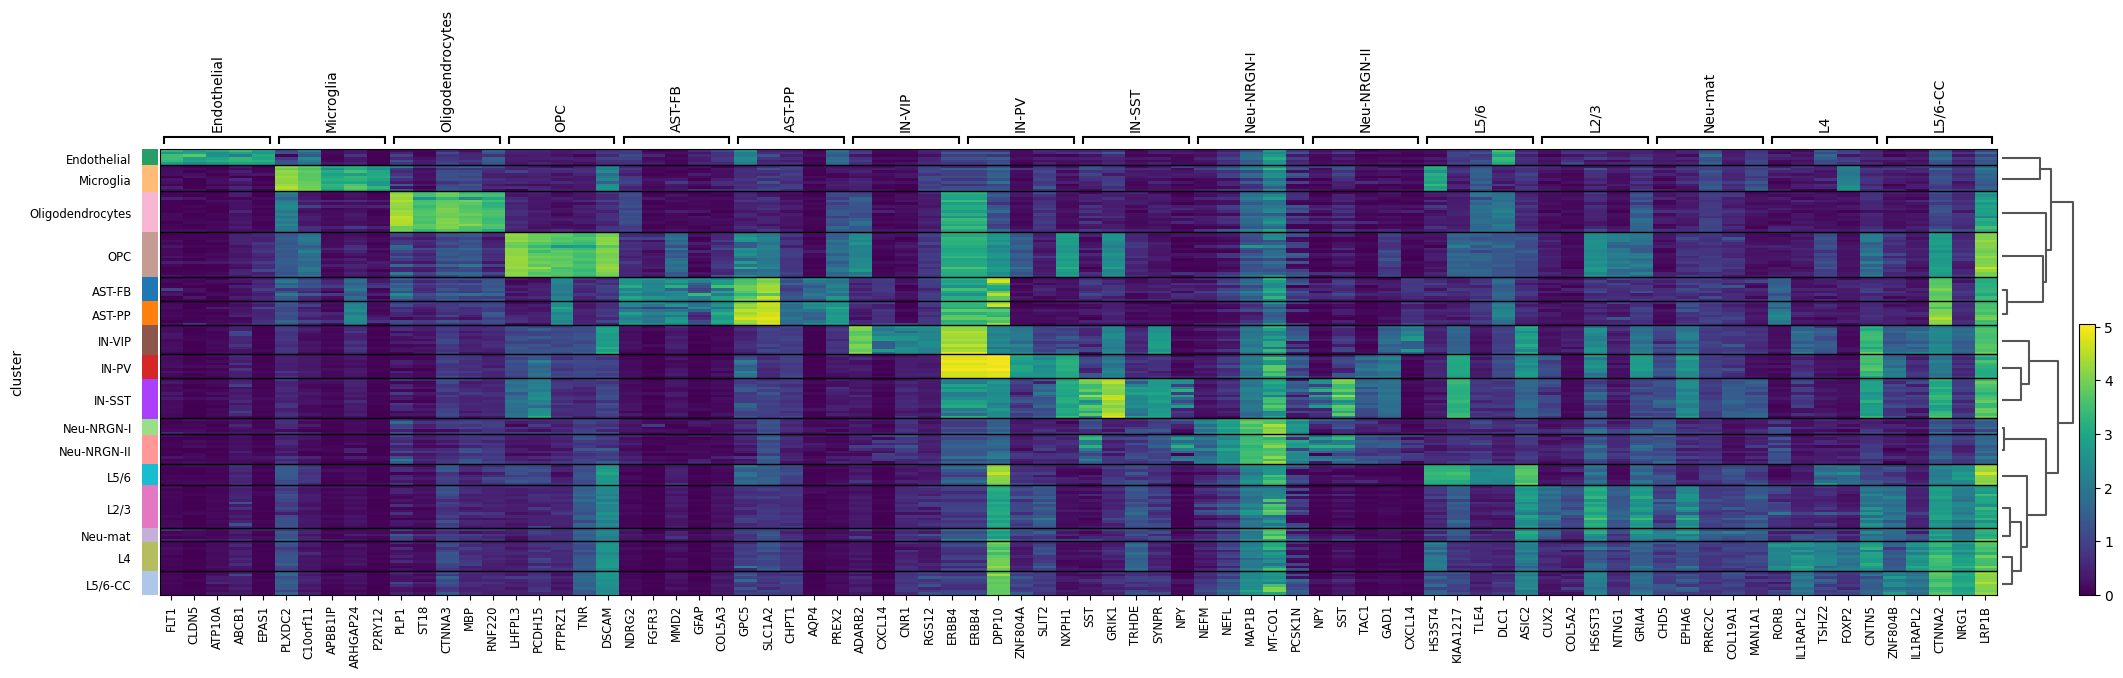

In [118]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="cluster", show_gene_labels=True)

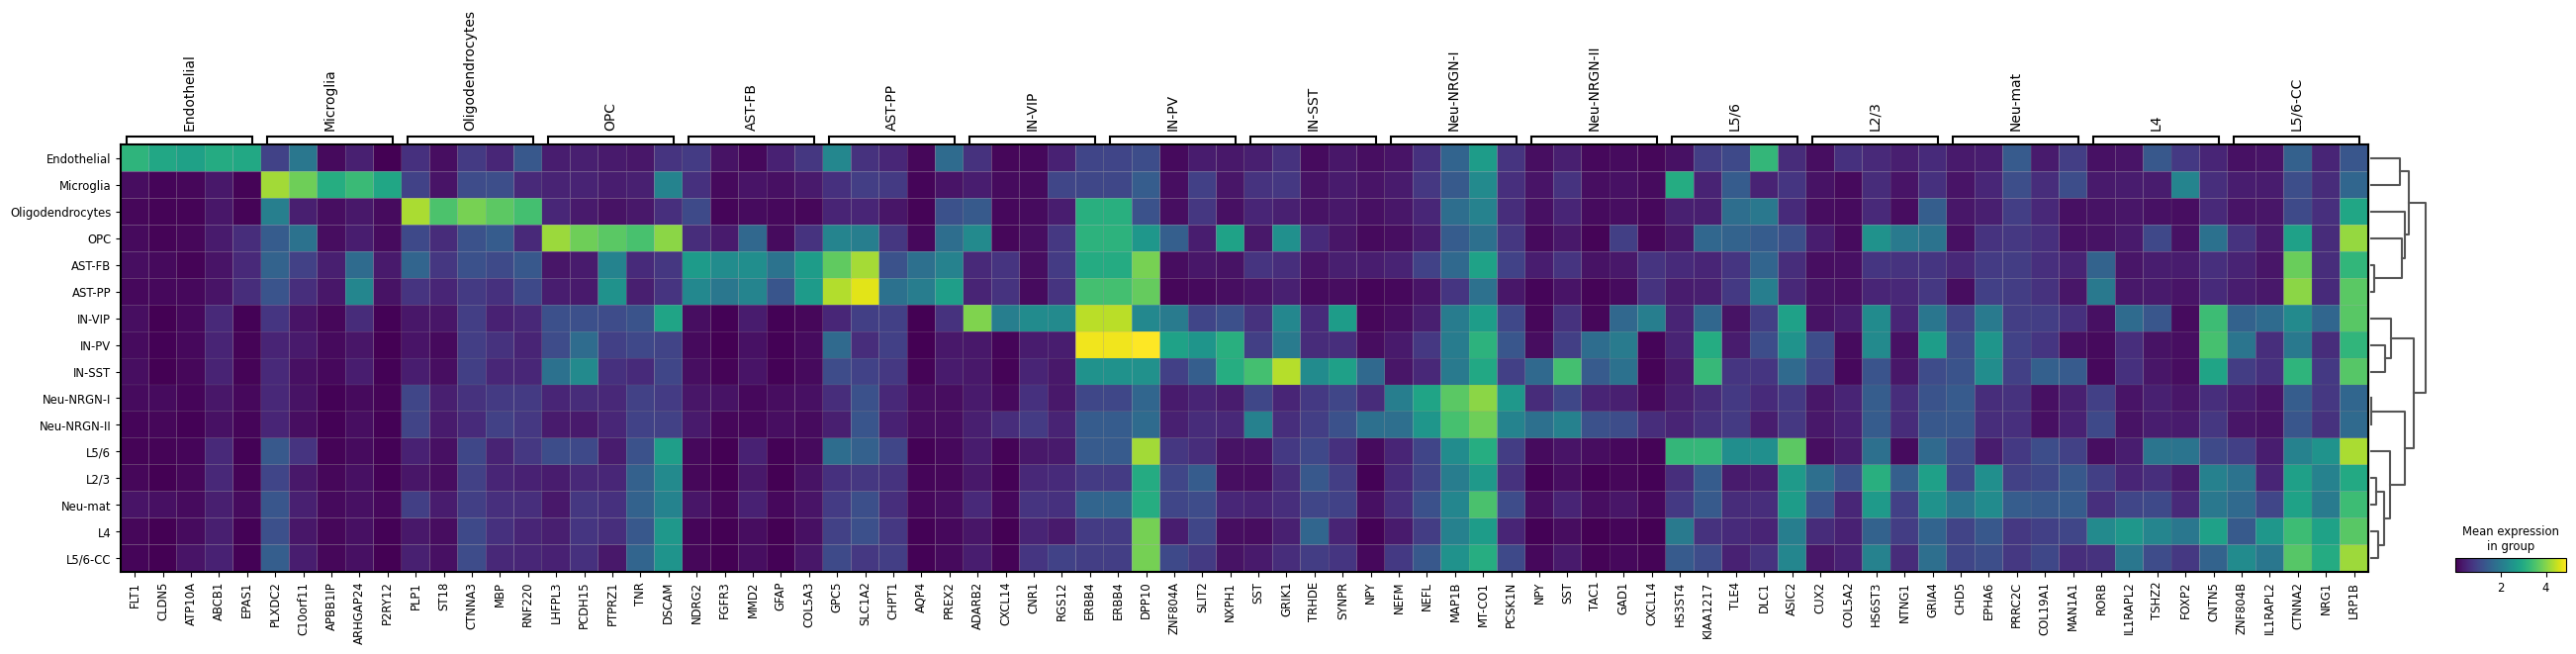

In [119]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="cluster")

### Save results

In [120]:
adata_pb.write_h5ad("results/pb_adata_diffexpr.h5ad")